In [1]:
!pip install fiftyone

  Using cached regex-2023.12.25-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB 8.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/7.9 MB 6.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.9 MB 8.4 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.9 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.9 MB 7.5 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.9 MB 7.1 MB/s eta 0:00:01
   ----------- -----------------------

In [2]:
import fiftyone as fo
import os

Migrating database to v0.23.5


In [96]:
# Path to your dataset directory
dataset_dir = 'C:\\Users\\SiddhantSoam\\UVeye\\Grounded-Segment-Anything-main\\sam_testing_output'

In [97]:
# Loop through the dataset directory and process each image
def create_dataset(damage_label, voxel_dataset):
    counter=0
    for filename in os.listdir(dataset_dir):
        if not filename.endswith(".png") or "_mask" in filename:
            continue

        base_name = os.path.splitext(filename)[0]
        # Find the corresponding mask file(s)
        mask_files  = [f for f in os.listdir(dataset_dir) if f.startswith(base_name) and "_mask" in f]
        
        if len(mask_files) > 0:
            found_sun_damage_file = False
            for file_name in mask_files:
                if damage_label in file_name:
                    found_sun_damage_file = True
                    mask_filename = file_name
                    break
            if not found_sun_damage_file:
                continue            
            mask_path = os.path.join(dataset_dir, mask_filename)
        else:
            continue

        # Construct the image path
        image_path = os.path.join(dataset_dir, filename)

        # Define the segmentation mask (if exists)
        if mask_path:
            # print("maskPath ", mask_path)
            segmentation = fo.Segmentation(mask_path=mask_path)
        else:
            segmentation = None

        # Create a sample for the image
        sample = fo.Sample(
            filepath=image_path,
            segmentation=segmentation
        )

        sample["scanID"] = base_name

        # Add the sample to the dataset
        voxel_dataset.add_sample(sample)
        counter = counter+1

        if counter==100:
            break



In [98]:
# Create a new FiftyOne dataset
sun_damage_dataset = fo.Dataset("sun_damage_dataset")
create_dataset('sun_damage', sun_damage_dataset)


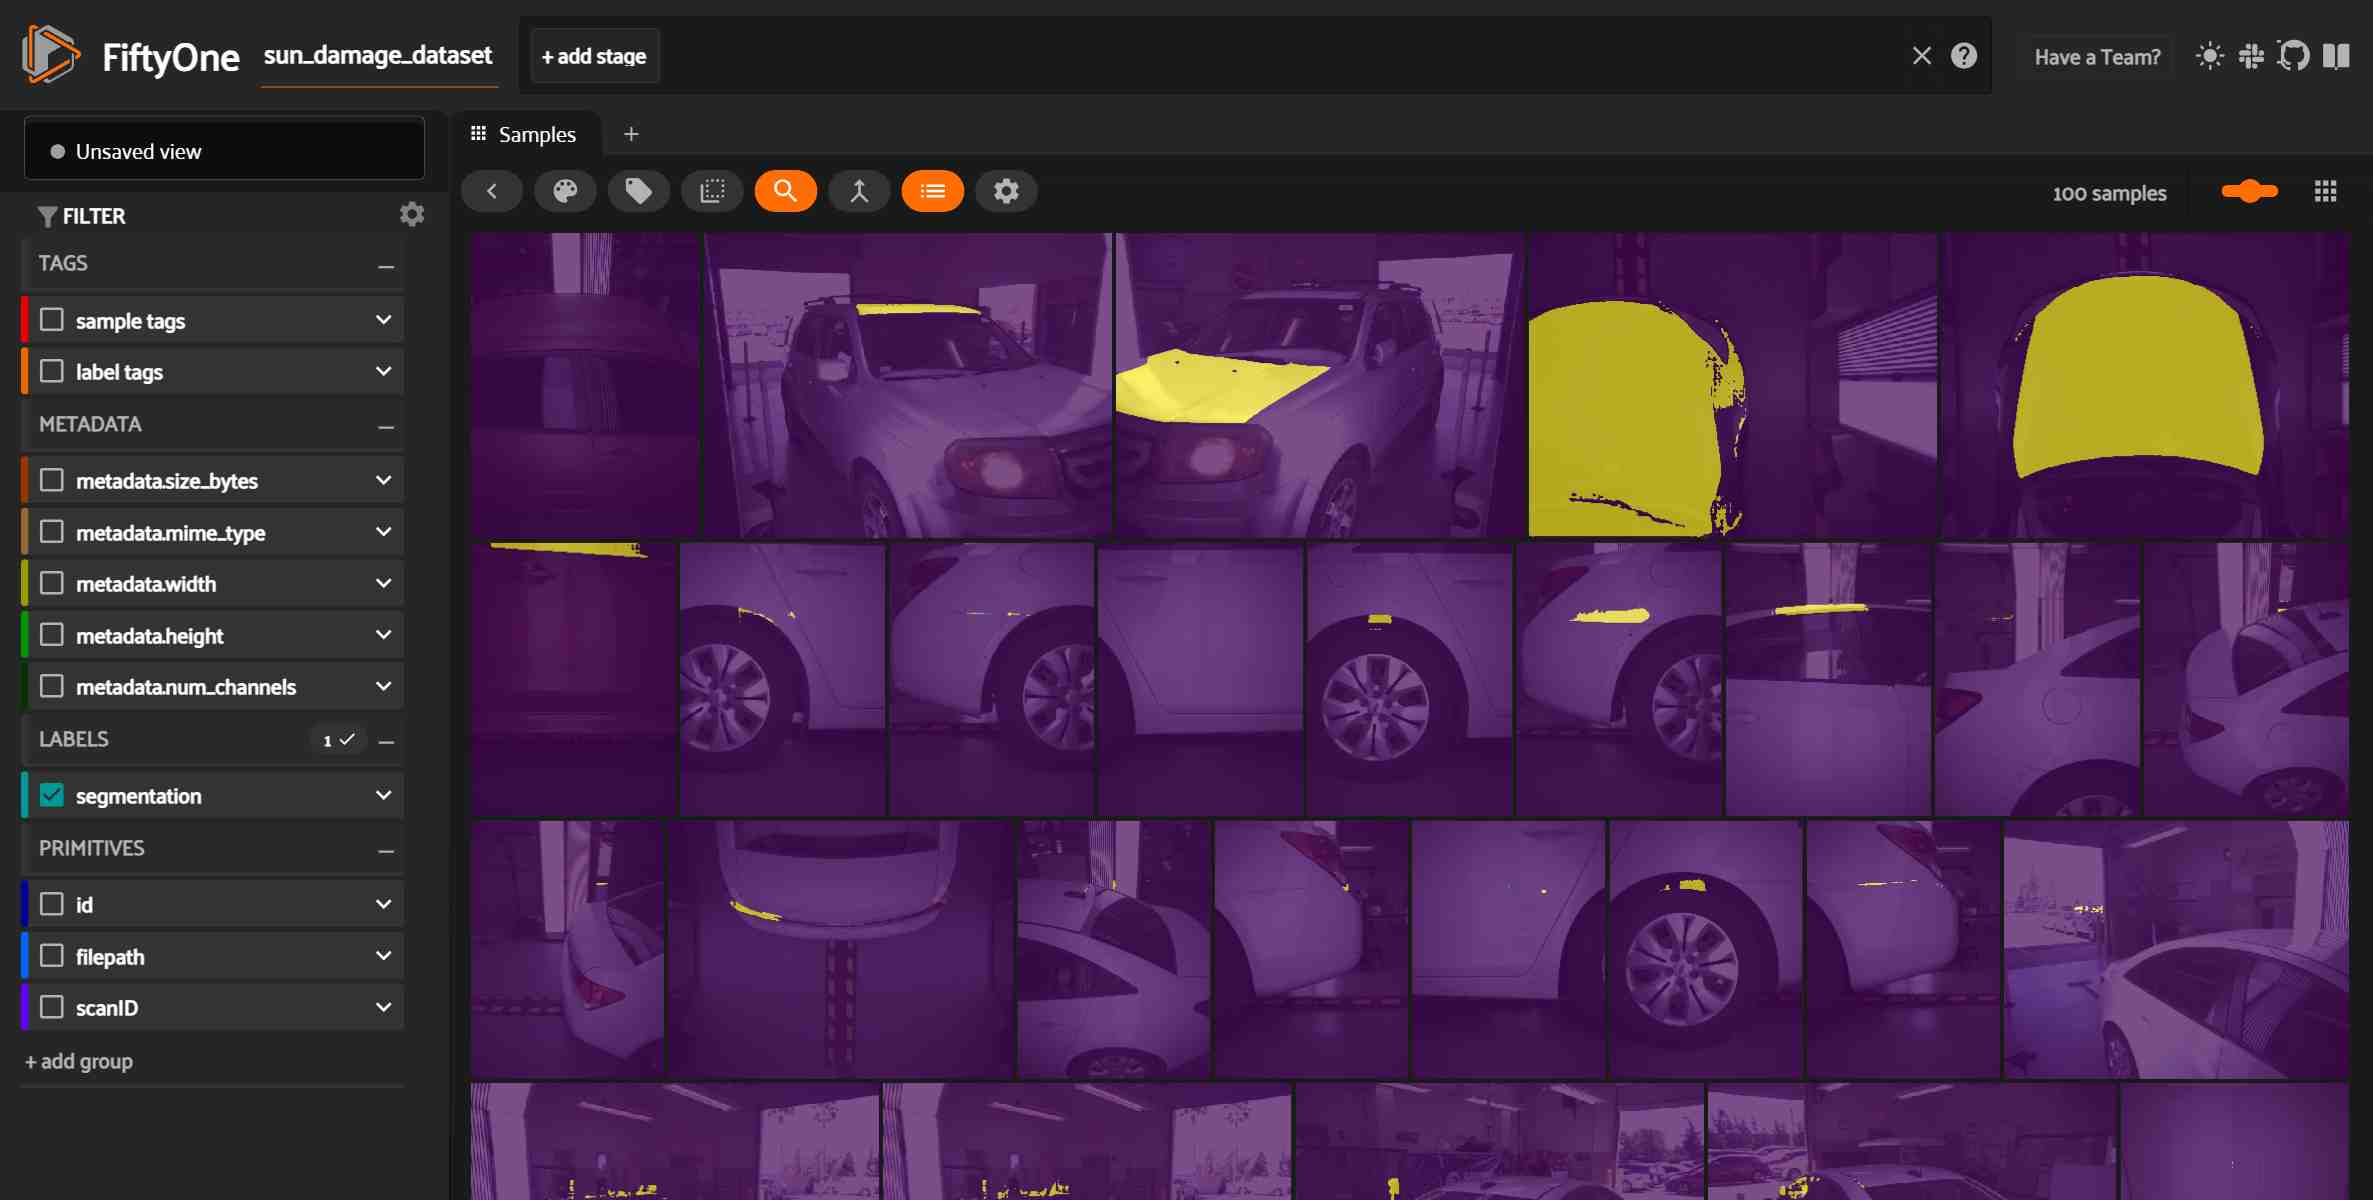

In [99]:
# Launch the FiftyOne app to visualize the dataset
session_sun_damage = fo.launch_app(sun_damage_dataset)

In [100]:
session_sun_damage.close()

In [92]:
fo.delete_dataset('sun_damage_dataset')

In [101]:
# Create a new FiftyOne dataset
severe_scratch_dataset = fo.Dataset("severe_scratch_dataset")
create_dataset('severe_scratch', severe_scratch_dataset)


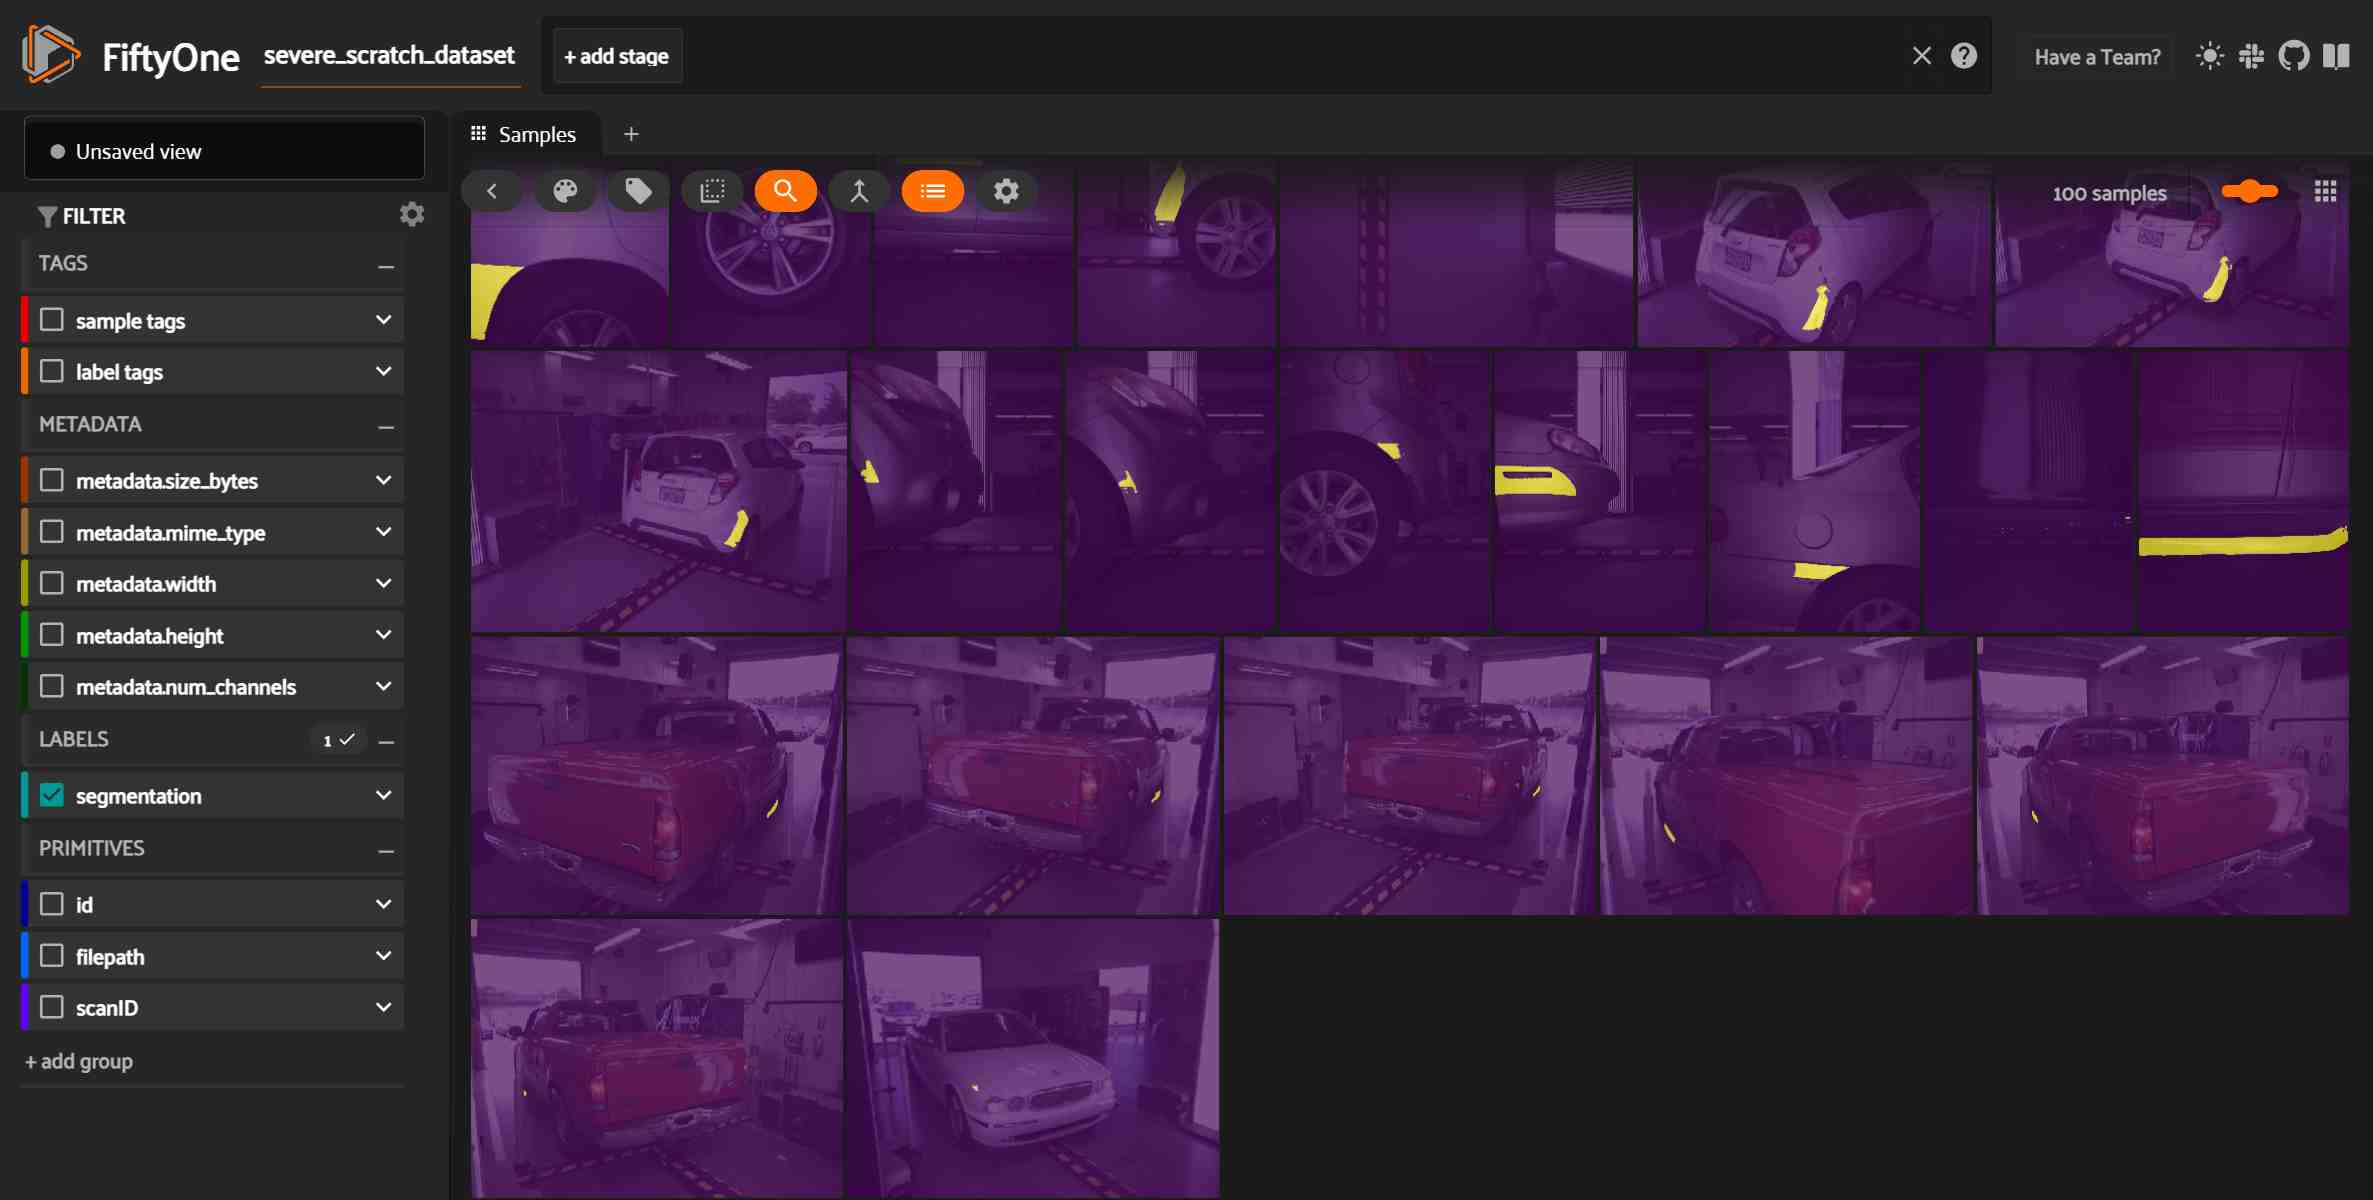

In [102]:
# Launch the FiftyOne app to visualize the dataset
session_severe_scratch = fo.launch_app(severe_scratch_dataset)

In [94]:
session_severe_scratch.close()

In [103]:
fo.delete_dataset('severe_scratch_dataset')

In [104]:
# Create a new FiftyOne dataset
big_dent_dataset = fo.Dataset("big_dent_dataset")
create_dataset('big_dent', big_dent_dataset)

In [105]:
# Launch the FiftyOne app to visualize the dataset
session_big_dent = fo.launch_app(big_dent_dataset)

In [ ]:
session_big_dent.close()

In [ ]:
fo.delete_dataset('big_dent_dataset')